In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Visual Question Answering (VQA) with Imagen on Vertex AI

## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) (image Generative AI) offers a variety of features:
- Image generation
- Image editing
- Visual captioning
- Visual question answering

This notebook focuses on **visual question answering** only.

[Visual question answering (VQA) with Imagen](https://cloud.google.com/vertex-ai/docs/generative-ai/image/visual-question-answering) can understand the content of an image and answer questions about it. The model takes in an image and a question as input, and then using the image as context to produce one or more answers to the question.

The visual question answering (VQA) can be used for a variety of use cases, including:
- assisting the visually impaired to gain more information about the images
- answering customer questions about products or services in the image
- creating interactive learning environment and providing interactive learning experiences

### Objectives

In this notebook, you will learn how to use the Vertex AI Python SDK to:

- Answering questions about images using the Imagen's visual question answering features

- Experiment with different parameters, such as:
    - number of answers to be provided by the model

### Costs

This tutorial uses billable components of Google Cloud:
- Vertex AI (Imagen)

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK, other packages and their dependencies

In [1]:
%pip install --upgrade --user google-cloud-aiplatform>=1.29.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Define Google Cloud project information (Local only)

If you are running this notebook on Google Colab, you need to define Google Cloud project information to be used. In the following cell, you will define the information, import Vertex AI package, and initialize it. This step is also not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [1]:
# # Define project information
# PROJECT_ID = "[your-project-id]" # @param {type:"string"}
# LOCATION = "us-central1" # @param {type:"string"}

# # Initialize Vertex AI
# import vertexai
# vertexai.init(project=PROJECT_ID, location=LOCATION)

### Load the image question answering model

The model names from Vertex AI Imagen have two components: model name and version number. The naming convention follow this format: `<model-name>@<version-number>`. For example, `imagetext@001` represents the version **001** of the **imagetext** model.



In [1]:
from vertexai.preview.vision_models import ImageQnAModel

image_qna_model = ImageQnAModel.from_pretrained("imagetext@001")

### Load the image file

To use the image question answering model, you first need to create an `Image` class using the image file. The model only accepts `Image` class objects, so this is a necessary step before you can ask questions.


Addtinally, [Visual Question Answering with Imagen](https://cloud.google.com/vertex-ai/docs/generative-ai/image/visual-question-answering#img-vqa-rest) only accepts specific image file formats (e.g. PNG, JPEG), and may have file size is limitations (e.g. 10 MB). You can find out specific details from the [official documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/image/visual-question-answering#img-vqa-rest).

In [3]:
# Download an image from Google Cloud Storage

! gsutil cp "gs://wmt-aug23-vertexgenai-workshop-data/vision/google-cloud-next.jpeg" .

Copying gs://wmt-aug23-vertexgenai-workshop-data/vision/google-cloud-next.jpeg...
/ [1 files][240.3 KiB/240.3 KiB]                                                
Operation completed over 1 objects/240.3 KiB.                                    


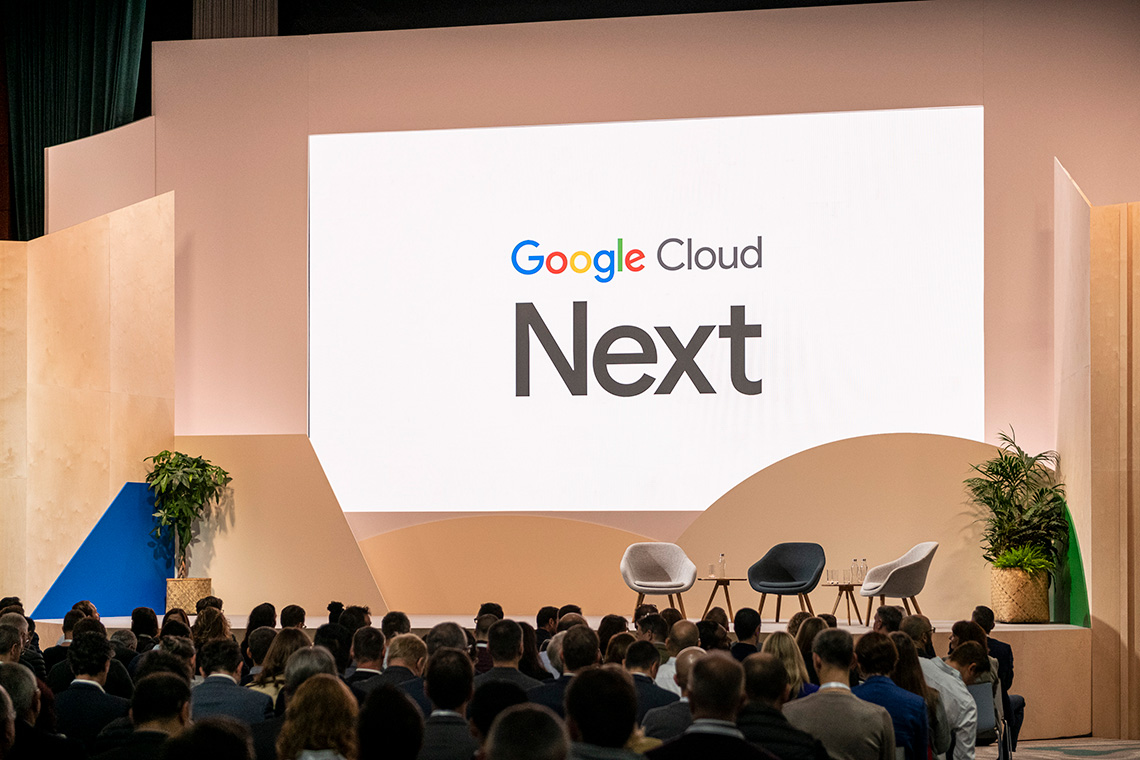

In [2]:
from vertexai.preview.vision_models import Image

# Load the image file as Image object
cloud_next_image = Image.load_from_file("google-cloud-next.jpeg")
cloud_next_image.show()

### Ask questions about the image

Now ask questions about the image using the model:

In [3]:
# Ask a question about the image
image_qna_model.ask_question(
  image=cloud_next_image,
  question="What is happening in this image?"
)

['google cloud next']

In [4]:
# Ask a follow up question about the image
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What are the people in the image doing?"
)

['sitting']

You can get up to three answers from a single image by changing the `number_of_results` parameter from 1 to 3.

In [5]:
# Get 3 answers from the image
image_qna_model.ask_question(
    image=cloud_next_image,
    question="What are the people in the image doing?",
    number_of_results=3,
)

['sitting', 'watching', 'watching a presentation']

## Try it yourself

Feel free to experiment with different images and model parameters to see how the results change.

In [11]:
# Download an image from Google Cloud Storage

! gsutil cp "gs://wmt-aug23-vertexgenai-workshop-data/vision/GettyImages-871168786.max-2600x2600.jpg" .

Copying gs://wmt-aug23-vertexgenai-workshop-data/vision/GettyImages-871168786.max-2600x2600.jpg...
- [1 files][  4.5 MiB/  4.5 MiB]                                                
Operation completed over 1 objects/4.5 MiB.                                      


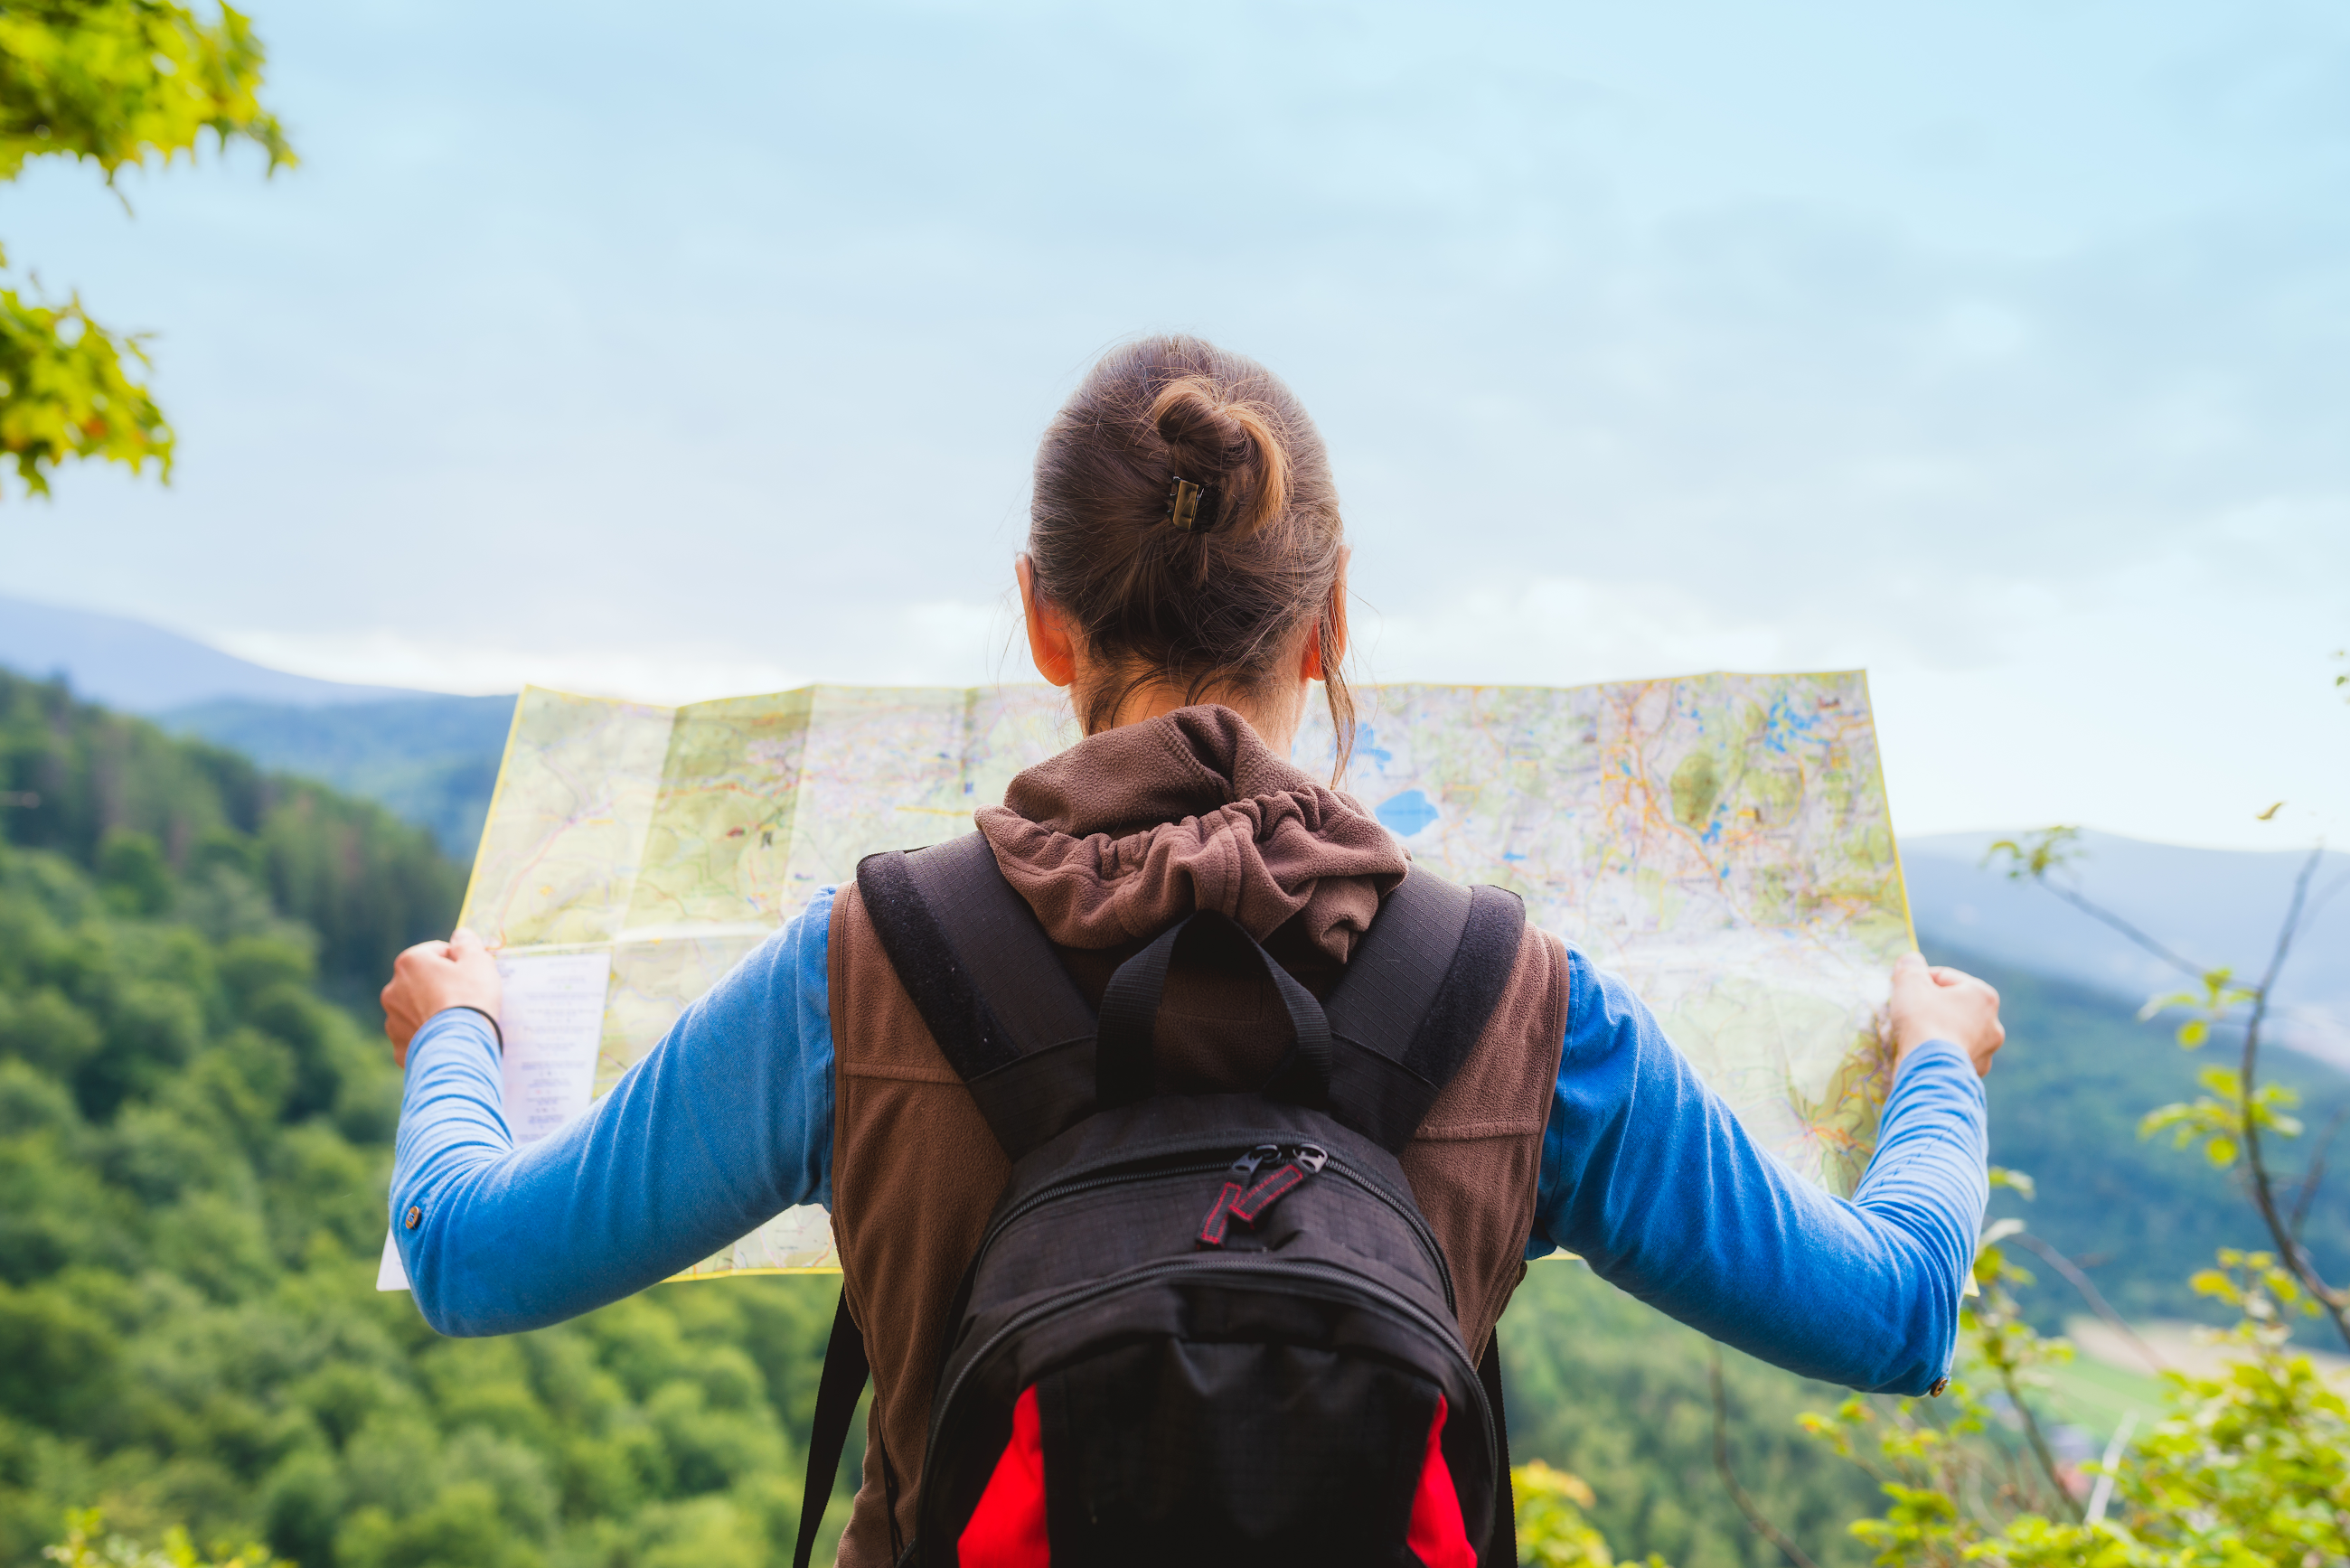

In [12]:
# Load the newly downloaded image
user_image = Image.load_from_file("GettyImages-871168786.max-2600x2600.jpg")
user_image.show()

In [13]:
# Ask a question about the image
image_qna_model.ask_question(
    image=user_image,
    question="What is happening in this photo?",
    number_of_results=3,
)

['hiking', 'woman', 'woman looking at map']

In [14]:
# Ask a question about the image
image_qna_model.ask_question(
    image=user_image,
    question="What advertising channels would this image be suitable for?",
    number_of_results=3,
)

['website', 'travel', 'magazine']

In [15]:
# Ask a question about the image
image_qna_model.ask_question(
      image=user_image,
      question="What type of insects could live in this area?",
      number_of_results=3,
)

['ladybugs', 'bugs', 'mosquitoes']